In [1]:
library(ggplot2)
library(dplyr)

theme_set(theme_grey(base_size = 18))
options(repr.plot.width=15, repr.plot.height=9)

set.seed(1949)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




### Set the parameters and sample

In [2]:
# Set the parameters of the discrete uniform distribution
a <- 1; b <- 10;
n <- b - a + 1
outcomes <- c(1:n)
prob <- 1/n

# Sample values from the discrete uniform distribution
samples <- sample(x = outcomes, size = 1000, replace = T, prob = rep(prob, n))
sample_df <- data.frame(x = samples)

# Calculate the probability of each event from the samples
sample_df <- sample_df %>%
    count(x, name = "n") %>%
    mutate(probability = n/sum(n))

# Create a data frame with the "true" distribution
uniform_df <- data.frame(
    "x" = outcomes,
    "probability" = prob
)

### Plot the estimates

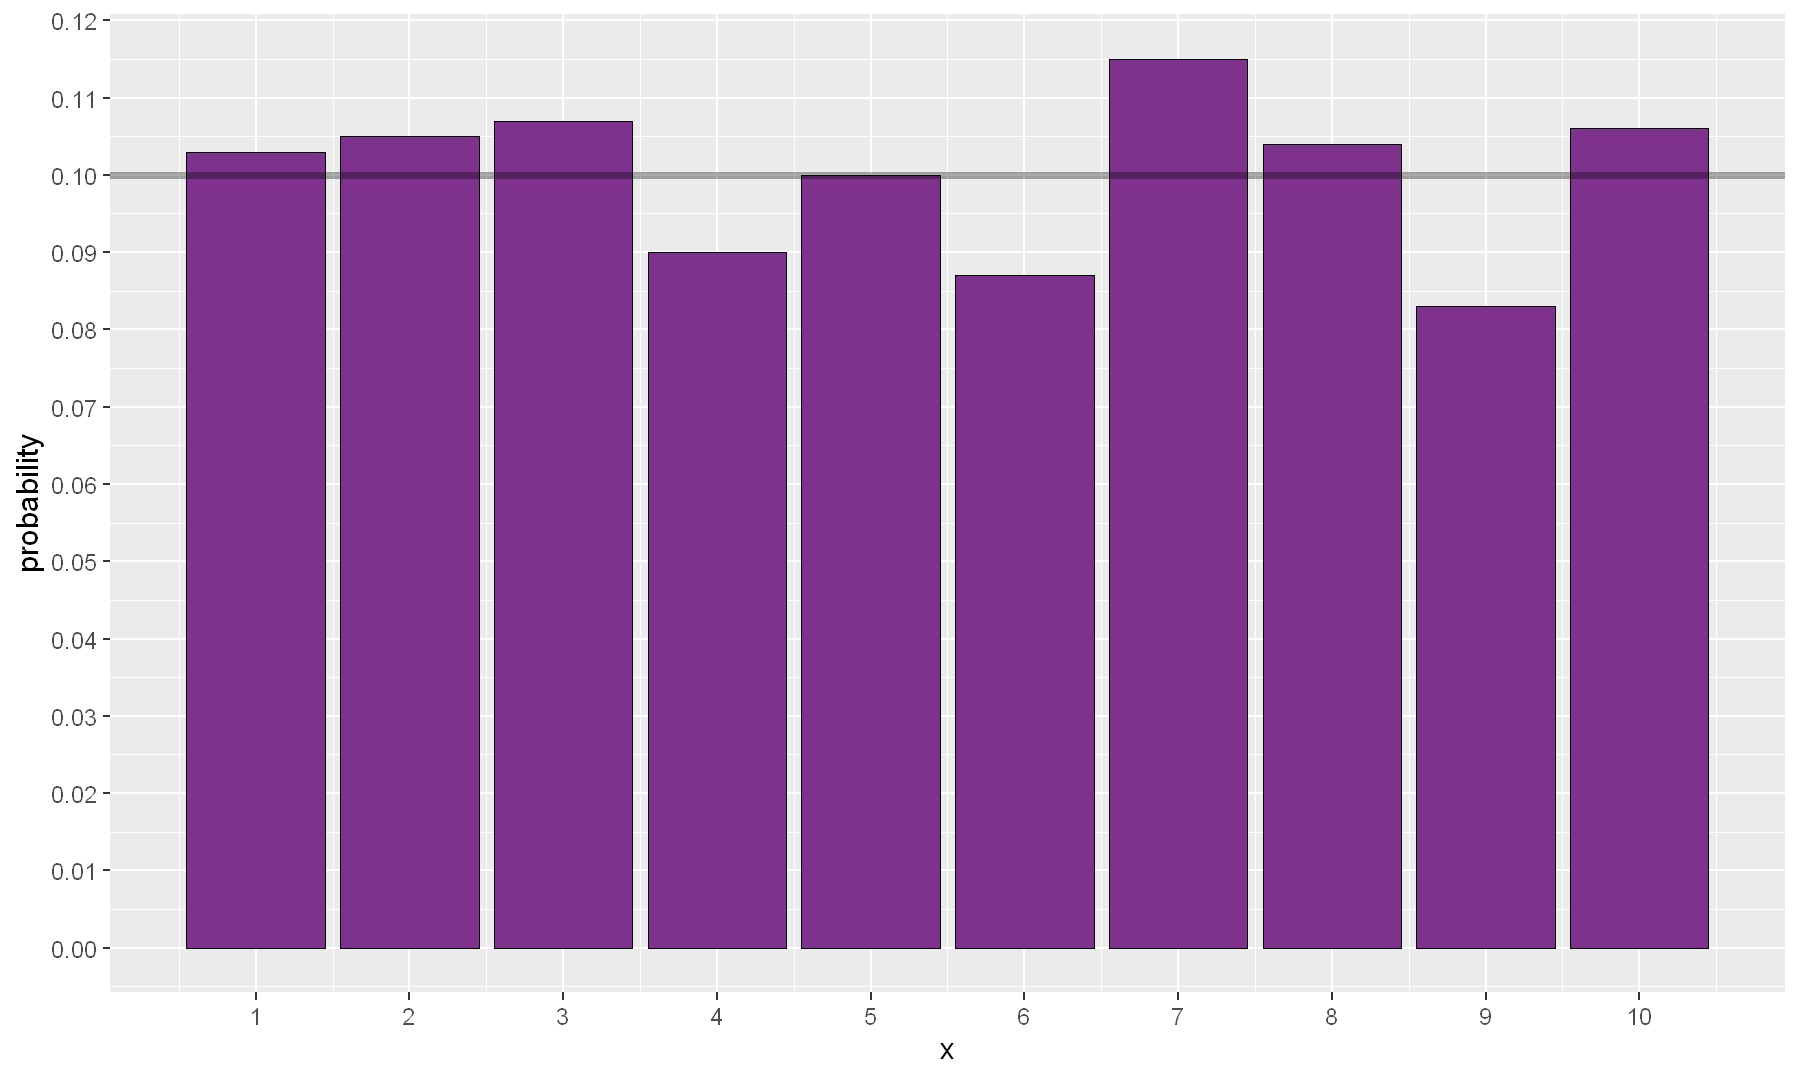

In [3]:
p_samples <- ggplot(data = sample_df) + 
    geom_col(
        aes(x=x, y = probability),
        width = 0.9, col="black", fill="#7E318D") +
    geom_hline(yintercept = prob, linewidth=2, alpha=0.33) +
    scale_x_continuous(breaks = outcomes) +
    scale_y_continuous(n.breaks = n)

p_samples
# saving 
# ggsave(plot = p_samples, width = 1920 ,height = 1080, units = "px", filename = "uniform_dist_samples.png", dpi = 96*2)

### Plot the true distribution

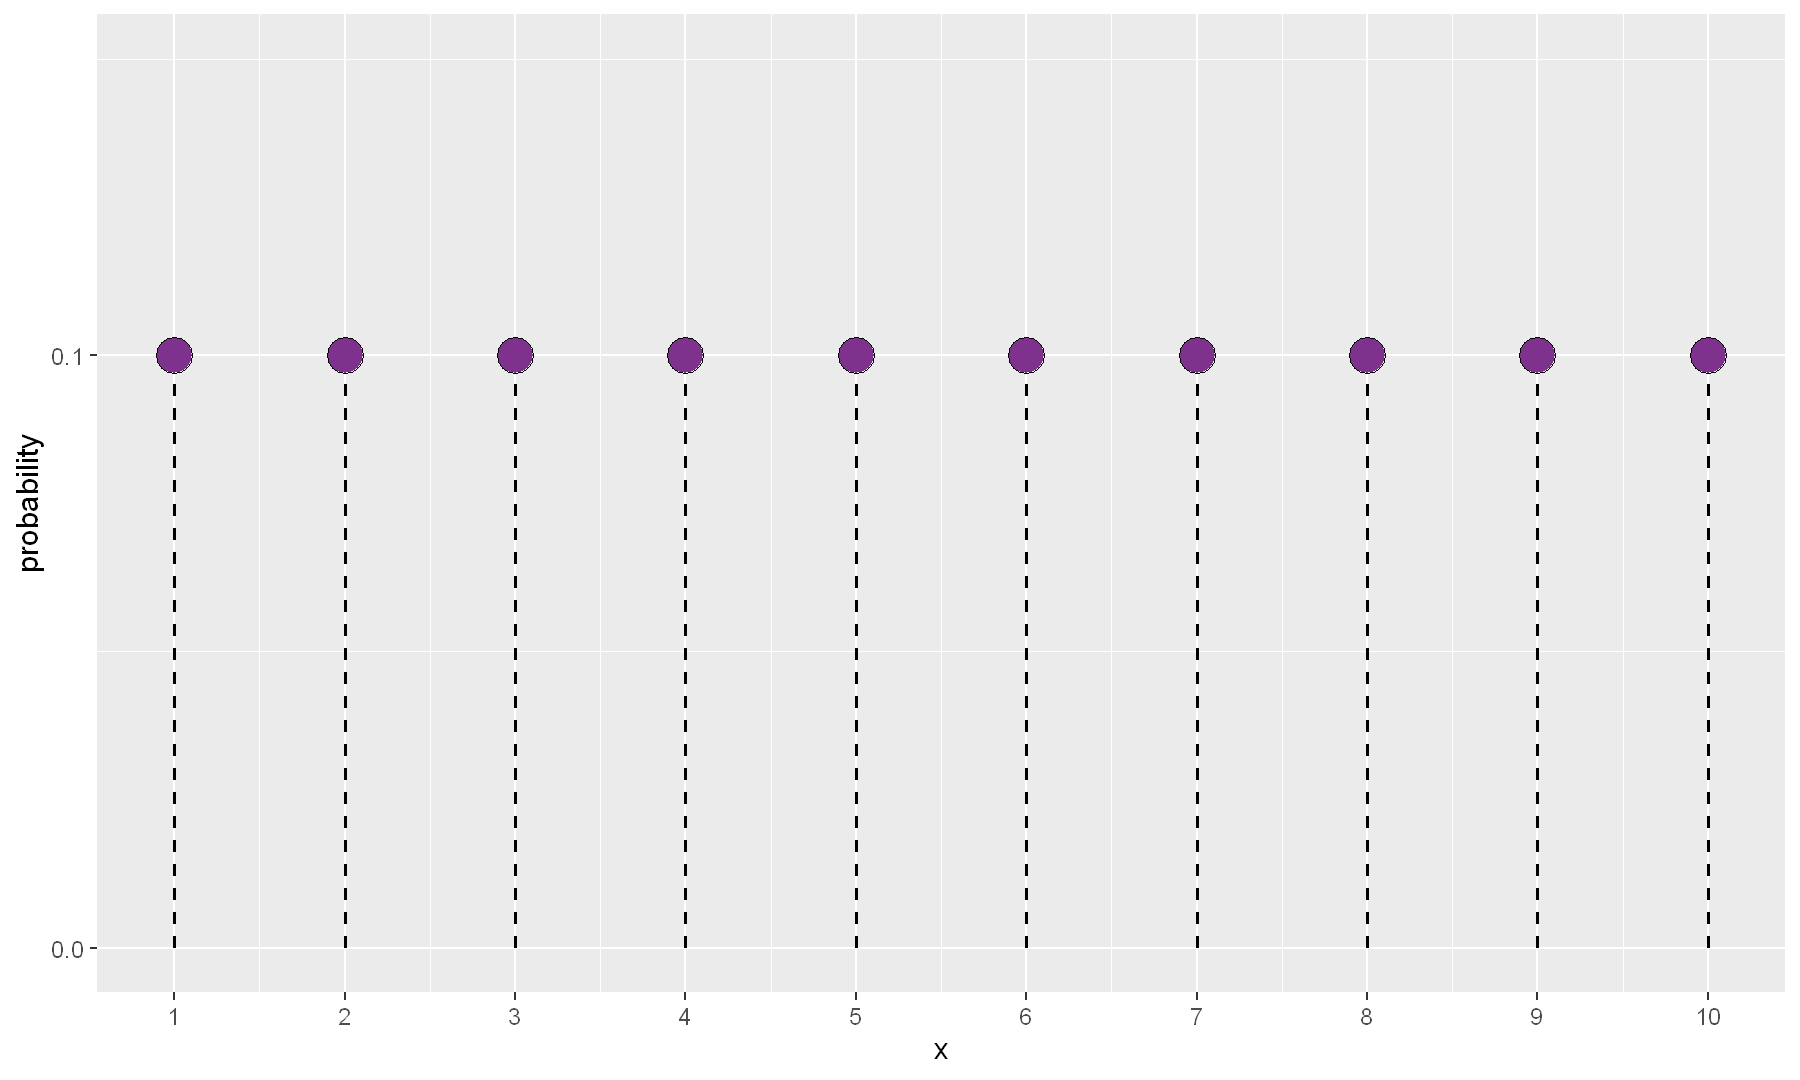

In [4]:
p_distribution <- ggplot(data = uniform_df, aes(x=x, y = probability)) + 
    geom_linerange(
        aes(ymin=0, ymax=probability),
        linewidth=1, linetype="dashed"
    ) +
    geom_point(size=10, shape=21, fill="#7E318D") +

    scale_x_continuous(breaks = outcomes) +
    scale_y_continuous(breaks = c(0, 1/n)) +

    coord_cartesian(ylim = c(0, 0.15))

p_distribution

# saving
# ggsave(plot = p_distribution, width = 1920 ,height = 1080, units = "px", filename = "uniform_dist.png", dpi = 96*2)